# Problem Statement
HR analytics is revolutionising the way human resources departments operate, leading to higher efficiency and better results overall. Human resources has been using analytics for years. However, the collection, processing and analysis of data has been largely manual, and given the nature of human resources dynamics and HR KPIs, the approach has been constraining HR. Therefore, it is surprising that HR departments woke up to the utility of machine learning so late in the game. Here is an opportunity to try predictive analytics in identifying the employees most likely to get promoted.

# Dataset Description
Variable	Definition
employee_id -Unique ID for employee
department	- Department of employee
region -	Region of employment (unordered)
education - Education Level
gender - Gender of Employee
recruitment_channel - Channel of recruitment for employee
no_of_trainings - no of other trainings completed in previous year on soft skills, technical skills etc.
age - Age of Employee
previous_year_rating - Employee Rating for the previous year
length_of_service - Length of service in years
KPIs_met >80% - if Percent of KPIs(Key performance Indicators) >80% then 1 else 0
awards_won? - if awards won during previous year then 1 else 0
avg_training_score - Average score in current training evaluations
is_promoted	(Target) - Recommended for promotion

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
dt_train = pd.read_csv(r'C:\Users\jyo14\.jupyter\hr_train.csv')

In [3]:
dt_train.shape
#dt_train.columns

(54808, 14)

In [4]:
dt_train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [5]:
dt_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
dt_train['education'] = dt_train['education'].fillna(dt_train['education'].mode()[0])

In [7]:
dt_train.education.isnull().sum()

0

In [8]:
dt_train['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [9]:
dt_train['previous_year_rating'] = dt_train['previous_year_rating'].fillna(dt_train['previous_year_rating'].mode()[0])

In [10]:
dt_train.isnull().sum()

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
KPIs_met >80%           0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

In [11]:
# Univariate Analysis

In [12]:
num_col = dt_train.select_dtypes(include=np.number).columns.to_list()

In [13]:
cat_col = dt_train.select_dtypes(include=object).columns.to_list()

<Axes: xlabel='is_promoted', ylabel='length_of_service'>

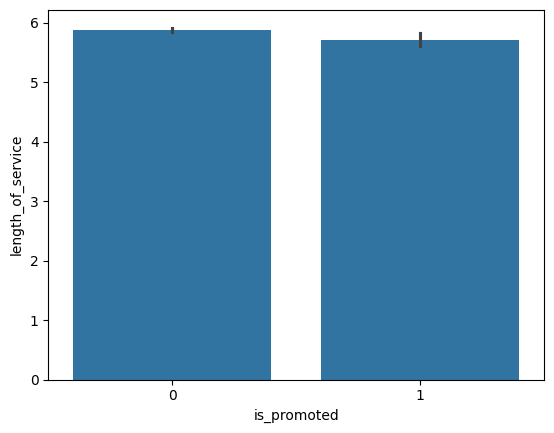

In [14]:
sns.barplot(y='length_of_service',x='is_promoted',data=dt_train)

<Axes: >

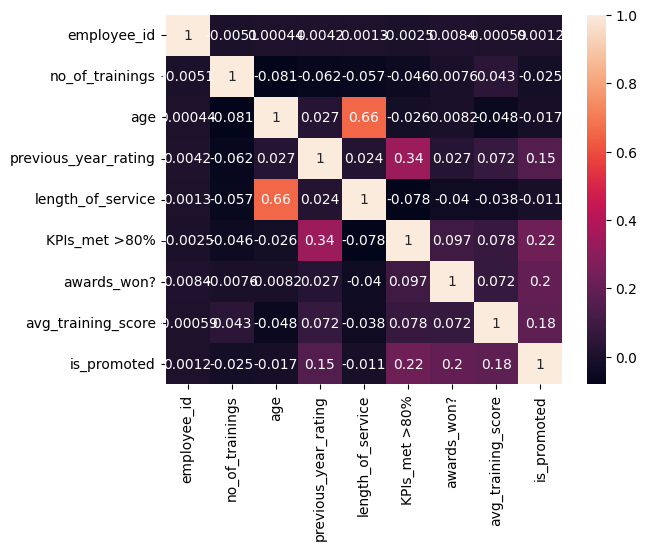

In [15]:
sns.heatmap(dt_train[num_col].corr(),annot=True)

In [16]:
dt_train[num_col].skew()

employee_id            -0.003128
no_of_trainings         3.445434
age                     1.007432
previous_year_rating   -0.260858
length_of_service       1.738061
KPIs_met >80%           0.619909
awards_won?             6.338914
avg_training_score      0.451908
is_promoted             2.972339
dtype: float64

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
l = LabelEncoder()

In [19]:
dt_train['education'] = l.fit_transform(dt_train['education'])

In [20]:
dt_train['department'] = l.fit_transform(dt_train['department'])

In [21]:
dt_train['gender'] = l.fit_transform(dt_train['gender'])
dt_train['recruitment_channel'] = l.fit_transform(dt_train['recruitment_channel'])

In [22]:
dt_train

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,7,region_7,2,0,2,1,35,5.0,8,1,0,49,0
1,65141,4,region_22,0,1,0,1,30,5.0,4,0,0,60,0
2,7513,7,region_19,0,1,2,1,34,3.0,7,0,0,50,0
3,2542,7,region_23,0,1,0,2,39,1.0,10,0,0,50,0
4,48945,8,region_26,0,1,0,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54803,3030,8,region_14,0,1,2,1,48,3.0,17,0,0,78,0
54804,74592,4,region_27,2,0,0,1,37,2.0,6,0,0,56,0
54805,13918,0,region_1,0,1,0,1,27,5.0,3,1,0,79,0
54806,13614,7,region_9,0,1,2,1,29,1.0,2,0,0,45,0


In [23]:
dt_train.length_of_service.skew()

1.738061458740809

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
x = dt_train.drop(columns=['employee_id','region','is_promoted'],axis=1)
y = dt_train['is_promoted']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,train_size=0.8,random_state=100)

In [26]:
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(43846, 11)
(43846,)
(10962, 11)
(10962,)


In [27]:
# Statistical Analysis

In [28]:
from scipy import stats

Ho : Both train and test data represent overall data
Ha : Both train and test data do not represent overall data    

In [29]:
def ttest_ind(train,test,feature):
    stat,pval=stats.ttest_ind(train[feature],test[feature])
    return pval

In [30]:
for i in xtrain.columns.to_list():
    pval = ttest_ind(xtrain,xtest,i)
    print(i,';',pval)

department ; 0.6724824756118888
education ; 0.5342009064347312
gender ; 0.6824205869622799
recruitment_channel ; 0.4841702795216396
no_of_trainings ; 0.4563270154424238
age ; 0.26088131967404327
previous_year_rating ; 0.9668918892633942
length_of_service ; 0.08508499838321028
KPIs_met >80% ; 0.340176076436044
awards_won? ; 0.0469541411395389
avg_training_score ; 0.029098318013625113


In [31]:
# As the pvalue is greater than alpha value(0.05),we fail to reject Null hypothesis

In [32]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
scale=dt_train[['age','length_of_service','avg_training_score']]
xtrain_sc = sc.fit_transform(scale)

In [33]:
xtrain_sc.std()

1.0

# Predictive Modeling

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,roc_auc_score,roc_curve,cohen_kappa_score,classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingClassifier,StackingClassifier

In [35]:
mod = []
acu = []
pre = []
f1 = []
rec = []
ck = []
def model_validation(model,xtrain,ytrain,xtest,ytest):
    m = model
    m.fit(xtrain,ytrain)
    hard = m.predict(xtest)
    soft = m.predict_proba(xtest)[:,1]
    print('Classification report \n',classification_report(ytest,hard))
    fpr,tpr,thres = roc_curve(ytest,soft)
    plt.title(f'ROC_AUC:{round(roc_auc_score(ytest,soft),3)}')
    plt.plot(fpr,tpr)
    plt.plot([0,1],[0,1],ls='--',color='red')
    plt.show()
    inp = input('Do you want to add this to the scorecard? Y/N')
    if inp.lower() =='y':
        global scorecard
        mod.append(str(model))
        acu.append(accuracy_score(ytest,hard))
        pre.append(precision_score(ytest,hard))
        f1.append(f1_score(ytest,hard))
        rec.append(recall_score(ytest,hard))
        ck.append(cohen_kappa_score(ytest,hard))
        scorecard = pd.DataFrame({'Model':mod,
                                'Accuracy':acu,
                                'Precision':pre,
                                'F1_Score':f1,
                                'Recall':rec,
                                'Cohen-Kappa':ck})
    else:
        return

Classification report 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95      9988
           1       0.43      0.08      0.13       974

    accuracy                           0.91     10962
   macro avg       0.67      0.53      0.54     10962
weighted avg       0.87      0.91      0.88     10962



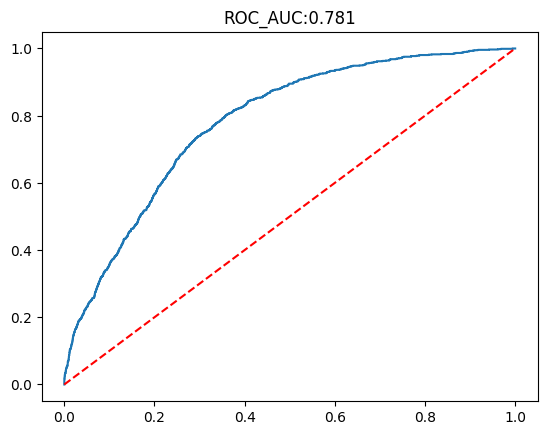

Do you want to add this to the scorecard? Y/Ny


In [36]:
model_validation(LogisticRegression(),xtrain,ytrain,xtest,ytest)

In [37]:
scorecard

,Model,Accuracy,Precision,F1_Score,Recall,Cohen-Kappa
0,LogisticRegression(),0.908958,0.431818,0.132174,0.078029,0.107912


# Decision Tree

In [38]:
gscv = GridSearchCV(estimator=DecisionTreeClassifier(),param_grid={'max_depth':[4,5,6]},cv=3,scoring='f1')

In [39]:
gscv.fit(xtrain,ytrain)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [4, 5, 6]}, scoring='f1')

In [40]:
gscv.best_score_

0.25302640624612593

In [41]:
gscv.best_params_

{'max_depth': 6}

Classification report 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      9988
           1       0.93      0.15      0.26       974

    accuracy                           0.92     10962
   macro avg       0.93      0.57      0.61     10962
weighted avg       0.92      0.92      0.90     10962



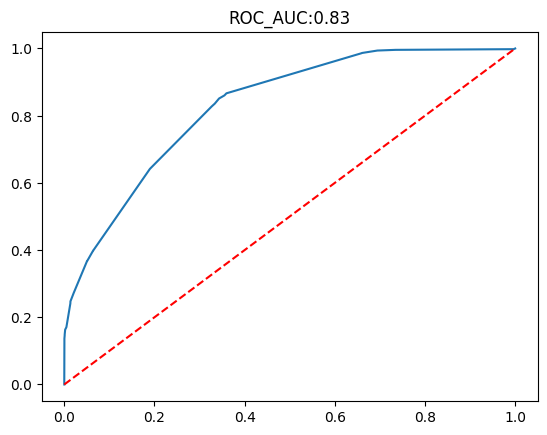

Do you want to add this to the scorecard? Y/Ny


In [42]:
model_validation(DecisionTreeClassifier(**gscv.best_params_),xtrain,ytrain,xtest,ytest)

In [43]:
scorecard

,Model,Accuracy,Precision,F1_Score,Recall,Cohen-Kappa
0,LogisticRegression(),0.908958,0.431818,0.132174,0.078029,0.107912
1,DecisionTreeClassifier(max_depth=6),0.923554,0.930380,0.259717,0.150924,0.240889


# Random Forest

Classification report 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96      9988
           1       0.95      0.15      0.25       974

    accuracy                           0.92     10962
   macro avg       0.94      0.57      0.61     10962
weighted avg       0.93      0.92      0.90     10962



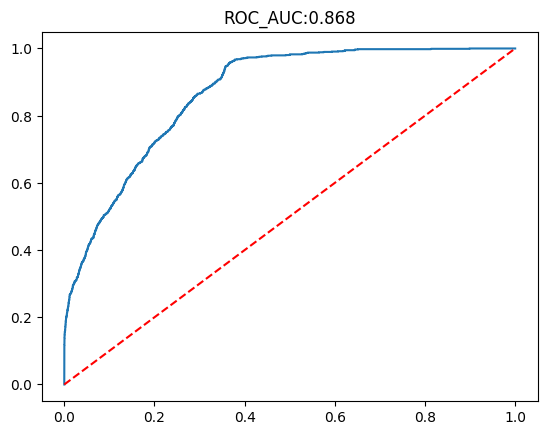

Do you want to add this to the scorecard? Y/Ny


In [44]:
model_validation(RandomForestClassifier(max_depth=8,n_estimators=120),xtrain,ytrain,xtest,ytest)

In [45]:
scorecard

,Model,Accuracy,Precision,F1_Score,Recall,Cohen-Kappa
0,LogisticRegression(),0.908958,0.431818,0.132174,0.078029,0.107912
1,DecisionTreeClassifier(max_depth=6),0.923554,0.930380,0.259717,0.150924,0.240889
2,"RandomForestClassifier(max_depth=8, n_estimato...",0.923554,0.953333,0.254448,0.146817,0.236338


# ADA Boost

Classification report 
               precision    recall  f1-score   support

           0       0.94      0.99      0.96      9988
           1       0.76      0.36      0.49       974

    accuracy                           0.93     10962
   macro avg       0.85      0.67      0.73     10962
weighted avg       0.92      0.93      0.92     10962



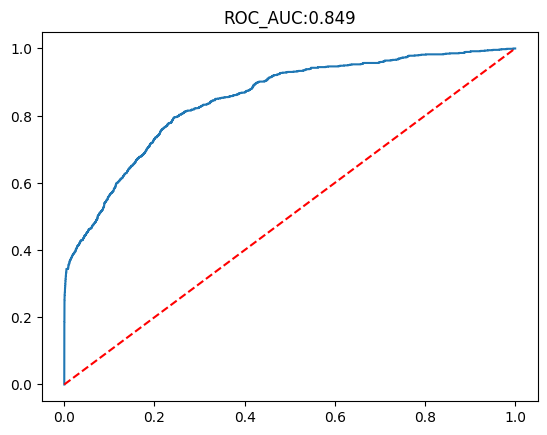

Do you want to add this to the scorecard? Y/Ny


In [46]:
model_validation(AdaBoostClassifier(learning_rate=0.5,n_estimators=120,base_estimator=DecisionTreeClassifier(max_depth=5)),xtrain,ytrain,xtest,ytest)

In [47]:
scorecard

,Model,Accuracy,Precision,F1_Score,Recall,Cohen-Kappa
0,LogisticRegression(),0.908958,0.431818,0.132174,0.078029,0.107912
1,DecisionTreeClassifier(max_depth=6),0.923554,0.930380,0.259717,0.150924,0.240889
2,"RandomForestClassifier(max_depth=8, n_estimato...",0.923554,0.953333,0.254448,0.146817,0.236338
3,AdaBoostClassifier(base_estimator=DecisionTree...,0.932950,0.758099,0.488518,0.360370,0.457454


# Gradient Boosting

Classification report 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      9988
           1       0.92      0.36      0.52       974

    accuracy                           0.94     10962
   macro avg       0.93      0.68      0.74     10962
weighted avg       0.94      0.94      0.93     10962



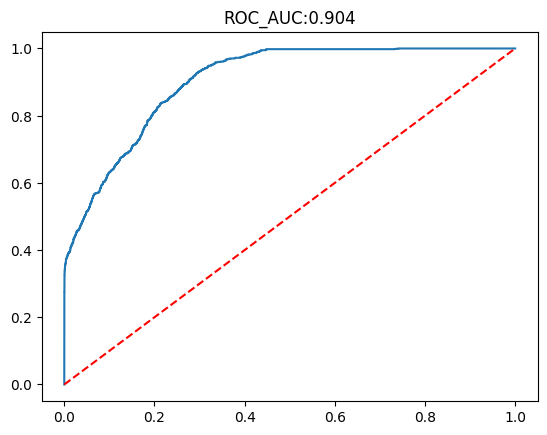

Do you want to add this to the scorecard? Y/Ny


In [48]:
model_validation(GradientBoostingClassifier(max_depth=6,n_estimators=150,learning_rate=0.1),xtrain,ytrain,xtest,ytest)

In [49]:
scorecard

,Model,Accuracy,Precision,F1_Score,Recall,Cohen-Kappa
0,LogisticRegression(),0.908958,0.431818,0.132174,0.078029,0.107912
1,DecisionTreeClassifier(max_depth=6),0.923554,0.930380,0.259717,0.150924,0.240889
2,"RandomForestClassifier(max_depth=8, n_estimato...",0.923554,0.953333,0.254448,0.146817,0.236338
3,AdaBoostClassifier(base_estimator=DecisionTree...,0.932950,0.758099,0.488518,0.360370,0.457454
4,"GradientBoostingClassifier(max_depth=6, n_esti...",0.940431,0.919060,0.518791,0.361396,0.493382


# XGBoost

Classification report 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      9988
           1       0.88      0.37      0.52       974

    accuracy                           0.94     10962
   macro avg       0.91      0.68      0.74     10962
weighted avg       0.94      0.94      0.93     10962



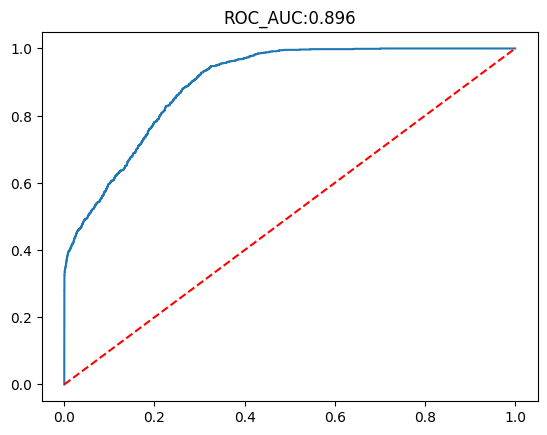

Do you want to add this to the scorecard? Y/Ny


In [50]:
model_validation(XGBClassifier(max_depth=5,n_estimators=120,learning_rate=0.5),xtrain,ytrain,xtest,ytest)

In [51]:
scorecard

,Model,Accuracy,Precision,F1_Score,Recall,Cohen-Kappa
0,LogisticRegression(),0.908958,0.431818,0.132174,0.078029,0.107912
1,DecisionTreeClassifier(max_depth=6),0.923554,0.930380,0.259717,0.150924,0.240889
2,"RandomForestClassifier(max_depth=8, n_estimato...",0.923554,0.953333,0.254448,0.146817,0.236338
3,AdaBoostClassifier(base_estimator=DecisionTree...,0.932950,0.758099,0.488518,0.360370,0.457454
4,"GradientBoostingClassifier(max_depth=6, n_esti...",0.940431,0.919060,0.518791,0.361396,0.493382
5,"XGBClassifier(base_score=None, booster=None, c...",0.939427,0.879902,0.519537,0.368583,0.492935


# Voting

In [52]:
base_learners = [('DT_4',DecisionTreeClassifier(max_depth=6)),
                 ('DT_6',DecisionTreeClassifier(max_depth=5)),
                ('RF',RandomForestClassifier(n_estimators=120,max_depth=8)),
                ('XGB',XGBClassifier(max_depth=5,n_estimators=120))]

Classification report 
               precision    recall  f1-score   support

           0       0.93      1.00      0.96      9988
           1       0.97      0.18      0.30       974

    accuracy                           0.93     10962
   macro avg       0.95      0.59      0.63     10962
weighted avg       0.93      0.93      0.90     10962



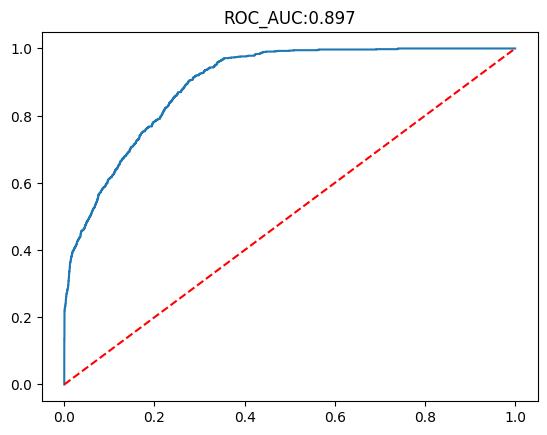

Do you want to add this to the scorecard? Y/Ny


In [53]:
model_validation(VotingClassifier(estimators=base_learners,voting='soft'),xtrain,ytrain,xtest,ytest)

In [54]:
scorecard

,Model,Accuracy,Precision,F1_Score,Recall,Cohen-Kappa
0,LogisticRegression(),0.908958,0.431818,0.132174,0.078029,0.107912
1,DecisionTreeClassifier(max_depth=6),0.923554,0.930380,0.259717,0.150924,0.240889
2,"RandomForestClassifier(max_depth=8, n_estimato...",0.923554,0.953333,0.254448,0.146817,0.236338
3,AdaBoostClassifier(base_estimator=DecisionTree...,0.932950,0.758099,0.488518,0.360370,0.457454
4,"GradientBoostingClassifier(max_depth=6, n_esti...",0.940431,0.919060,0.518791,0.361396,0.493382
5,"XGBClassifier(base_score=None, booster=None, c...",0.939427,0.879902,0.519537,0.368583,0.492935
6,"VotingClassifier(estimators=[('DT_4', Decision...",0.926747,0.972376,0.304762,0.180698,0.284846


# Stacking

Classification report 
               precision    recall  f1-score   support

           0       0.94      0.99      0.97      9988
           1       0.84      0.38      0.52       974

    accuracy                           0.94     10962
   macro avg       0.89      0.68      0.74     10962
weighted avg       0.93      0.94      0.93     10962



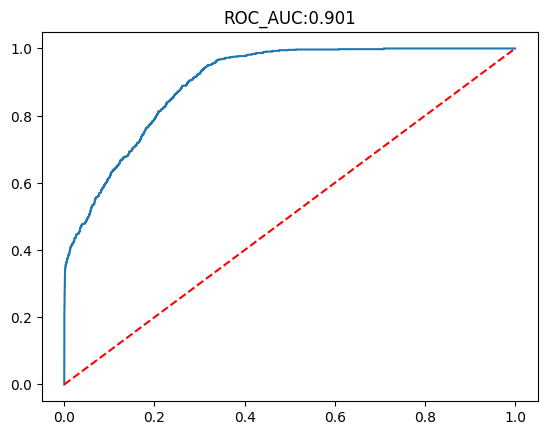

Do you want to add this to the scorecard? Y/Ny


In [55]:
model_validation(StackingClassifier(estimators=base_learners),xtrain,ytrain,xtest,ytest)

In [56]:
scorecard

,Model,Accuracy,Precision,F1_Score,Recall,Cohen-Kappa
0,LogisticRegression(),0.908958,0.431818,0.132174,0.078029,0.107912
1,DecisionTreeClassifier(max_depth=6),0.923554,0.930380,0.259717,0.150924,0.240889
2,"RandomForestClassifier(max_depth=8, n_estimato...",0.923554,0.953333,0.254448,0.146817,0.236338
3,AdaBoostClassifier(base_estimator=DecisionTree...,0.932950,0.758099,0.488518,0.360370,0.457454
4,"GradientBoostingClassifier(max_depth=6, n_esti...",0.940431,0.919060,0.518791,0.361396,0.493382
5,"XGBClassifier(base_score=None, booster=None, c...",0.939427,0.879902,0.519537,0.368583,0.492935
6,"VotingClassifier(estimators=[('DT_4', Decision...",0.926747,0.972376,0.304762,0.180698,0.284846
7,"StackingClassifier(estimators=[('DT_4', Decisi...",0.938059,0.837529,0.518781,0.375770,0.490754


In [57]:
# Lets go with XGB and tune it for final prediction

In [58]:
param = {'n_estimators':[100,120,150,200],
        'learning_rate':[0.5,0.1,0.75,1],
        'max_depth':[3,4,5,6,7]}

In [59]:
gscv = GridSearchCV(estimator=XGBClassifier(),param_grid=param,
                    scoring='f1',verbose=3)

In [60]:
gscv.fit(xtrain,ytrain)

Fitting 5 folds for each of 80 candidates, totalling 400 fits
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.492 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.457 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.482 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.519 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=100;, score=0.546 total time=   0.0s
[CV 1/5] END learning_rate=0.5, max_depth=3, n_estimators=120;, score=0.492 total time=   0.0s
[CV 2/5] END learning_rate=0.5, max_depth=3, n_estimators=120;, score=0.456 total time=   0.0s
[CV 3/5] END learning_rate=0.5, max_depth=3, n_estimators=120;, score=0.484 total time=   0.0s
[CV 4/5] END learning_rate=0.5, max_depth=3, n_estimators=120;, score=0.524 total time=   0.0s
[CV 5/5] END learning_rate=0.5, max_depth=3, n_estimators=120;, score=0.545 total t

[CV 2/5] END learning_rate=0.5, max_depth=7, n_estimators=120;, score=0.458 total time=   0.1s
[CV 3/5] END learning_rate=0.5, max_depth=7, n_estimators=120;, score=0.466 total time=   0.3s
[CV 4/5] END learning_rate=0.5, max_depth=7, n_estimators=120;, score=0.514 total time=   0.1s
[CV 5/5] END learning_rate=0.5, max_depth=7, n_estimators=120;, score=0.528 total time=   0.1s
[CV 1/5] END learning_rate=0.5, max_depth=7, n_estimators=150;, score=0.470 total time=   0.1s
[CV 2/5] END learning_rate=0.5, max_depth=7, n_estimators=150;, score=0.457 total time=   0.1s
[CV 3/5] END learning_rate=0.5, max_depth=7, n_estimators=150;, score=0.476 total time=   0.2s
[CV 4/5] END learning_rate=0.5, max_depth=7, n_estimators=150;, score=0.514 total time=   0.1s
[CV 5/5] END learning_rate=0.5, max_depth=7, n_estimators=150;, score=0.521 total time=   0.1s
[CV 1/5] END learning_rate=0.5, max_depth=7, n_estimators=200;, score=0.483 total time=   0.3s
[CV 2/5] END learning_rate=0.5, max_depth=7, n_est

[CV 5/5] END learning_rate=0.1, max_depth=6, n_estimators=150;, score=0.541 total time=   0.1s
[CV 1/5] END learning_rate=0.1, max_depth=6, n_estimators=200;, score=0.492 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=6, n_estimators=200;, score=0.468 total time=   0.2s
[CV 3/5] END learning_rate=0.1, max_depth=6, n_estimators=200;, score=0.482 total time=   0.2s
[CV 4/5] END learning_rate=0.1, max_depth=6, n_estimators=200;, score=0.527 total time=   0.2s
[CV 5/5] END learning_rate=0.1, max_depth=6, n_estimators=200;, score=0.540 total time=   0.2s
[CV 1/5] END learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.481 total time=   0.1s
[CV 2/5] END learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.466 total time=   0.1s
[CV 3/5] END learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.472 total time=   0.1s
[CV 4/5] END learning_rate=0.1, max_depth=7, n_estimators=100;, score=0.516 total time=   0.1s
[CV 5/5] END learning_rate=0.1, max_depth=7, n_est

[CV 2/5] END learning_rate=0.75, max_depth=6, n_estimators=100;, score=0.458 total time=   0.1s
[CV 3/5] END learning_rate=0.75, max_depth=6, n_estimators=100;, score=0.465 total time=   0.0s
[CV 4/5] END learning_rate=0.75, max_depth=6, n_estimators=100;, score=0.504 total time=   0.1s
[CV 5/5] END learning_rate=0.75, max_depth=6, n_estimators=100;, score=0.533 total time=   0.0s
[CV 1/5] END learning_rate=0.75, max_depth=6, n_estimators=120;, score=0.488 total time=   0.1s
[CV 2/5] END learning_rate=0.75, max_depth=6, n_estimators=120;, score=0.457 total time=   0.1s
[CV 3/5] END learning_rate=0.75, max_depth=6, n_estimators=120;, score=0.454 total time=   0.1s
[CV 4/5] END learning_rate=0.75, max_depth=6, n_estimators=120;, score=0.513 total time=   0.1s
[CV 5/5] END learning_rate=0.75, max_depth=6, n_estimators=120;, score=0.520 total time=   0.1s
[CV 1/5] END learning_rate=0.75, max_depth=6, n_estimators=150;, score=0.470 total time=   0.2s
[CV 2/5] END learning_rate=0.75, max_dep

[CV 5/5] END learning_rate=1, max_depth=5, n_estimators=120;, score=0.514 total time=   0.1s
[CV 1/5] END learning_rate=1, max_depth=5, n_estimators=150;, score=0.482 total time=   0.1s
[CV 2/5] END learning_rate=1, max_depth=5, n_estimators=150;, score=0.467 total time=   0.1s
[CV 3/5] END learning_rate=1, max_depth=5, n_estimators=150;, score=0.472 total time=   0.1s
[CV 4/5] END learning_rate=1, max_depth=5, n_estimators=150;, score=0.503 total time=   0.1s
[CV 5/5] END learning_rate=1, max_depth=5, n_estimators=150;, score=0.509 total time=   0.1s
[CV 1/5] END learning_rate=1, max_depth=5, n_estimators=200;, score=0.467 total time=   0.1s
[CV 2/5] END learning_rate=1, max_depth=5, n_estimators=200;, score=0.449 total time=   0.2s
[CV 3/5] END learning_rate=1, max_depth=5, n_estimators=200;, score=0.462 total time=   0.2s
[CV 4/5] END learning_rate=1, max_depth=5, n_estimators=200;, score=0.508 total time=   0.2s
[CV 5/5] END learning_rate=1, max_depth=5, n_estimators=200;, score=0.

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.5, 0.1, 0.75, 1],
                         'max_depth': [3, 4, 5, 6, 7],
                         'n_estimators': [100, 120, 150, 200]},
             scoring='f1', verbose=3)

Classification report 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      9988
           1       0.89      0.36      0.51       974

    accuracy                           0.94     10962
   macro avg       0.92      0.68      0.74     10962
weighted avg       0.94      0.94      0.93     10962



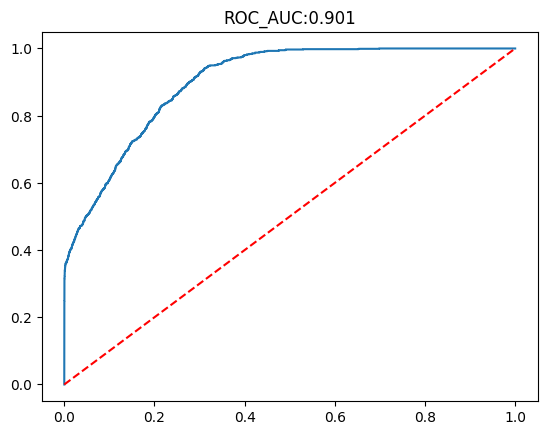

Do you want to add this to the scorecard? Y/Ny


In [61]:
model_validation(XGBClassifier(**gscv.best_params_),xtrain,ytrain,xtest,ytest)

In [62]:
scorecard

,Model,Accuracy,Precision,F1_Score,Recall,Cohen-Kappa
0,LogisticRegression(),0.908958,0.431818,0.132174,0.078029,0.107912
1,DecisionTreeClassifier(max_depth=6),0.923554,0.930380,0.259717,0.150924,0.240889
2,"RandomForestClassifier(max_depth=8, n_estimato...",0.923554,0.953333,0.254448,0.146817,0.236338
3,AdaBoostClassifier(base_estimator=DecisionTree...,0.932950,0.758099,0.488518,0.360370,0.457454
4,"GradientBoostingClassifier(max_depth=6, n_esti...",0.940431,0.919060,0.518791,0.361396,0.493382
5,"XGBClassifier(base_score=None, booster=None, c...",0.939427,0.879902,0.519537,0.368583,0.492935
6,"VotingClassifier(estimators=[('DT_4', Decision...",0.926747,0.972376,0.304762,0.180698,0.284846
7,"StackingClassifier(estimators=[('DT_4', Decisi...",0.938059,0.837529,0.518781,0.375770,0.490754
8,"XGBClassifier(base_score=None, booster=None, c...",0.939245,0.888889,0.513869,0.361396,0.487546


# Final Model

In [63]:
final_model = XGBClassifier(**gscv.best_params_)

In [64]:
final_model.fit(xtrain,ytrain)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.5, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [65]:
# Prediction

In [66]:
xtest.head()

,department,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
39633,7,0,1,2,1,34,1.0,7,0,0,48
30898,8,2,0,0,1,43,3.0,7,0,0,79
21726,8,2,0,0,2,33,5.0,4,1,0,85
13413,2,0,1,0,1,31,3.0,3,0,0,51
22223,0,0,1,0,1,25,3.0,2,1,0,83


In [67]:
final_model.predict_proba([[7,2,0,2,1,40,5,25,0,0,73]])[:,1][0]

0.9905031